### Escuela Politécnica Nacional ###

**Nombre:** Kevin Eduardo Garcia Rodriguez

**Tema:** [Taller 5] Minimos Cuadrados

**Repositorio GIT:** https://github.com/Nattyrd/Metodos-Numericos-2025B

A)  Interpole los puntos:

p1 = (5.4, 3.2)

p2_i = (9.5, 0.7)

p3 = (12.3, -3.6)

De estos, el punto p2i, debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.

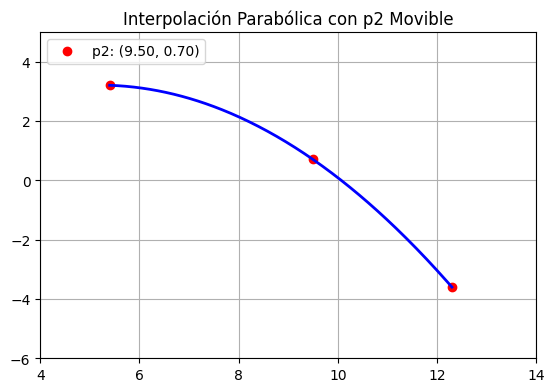

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton

# Puntos fijos
p1 = [5.4, 3.2]
p3 = [12.3, -3.6]
# Punto intermedio movible
p2 = [9.5, 0.7]

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
ax.set_xlim(4, 14)
ax.set_ylim(-6, 5)

# Dibujar los puntos
points, = ax.plot([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], 'ro')
curve, = ax.plot([], [], 'b-', linewidth=2)

# Crear leyenda vacía (se actualizará)
legend_text = ax.legend([f"p2: ({p2[0]:.2f}, {p2[1]:.2f})"], loc="upper left")

selected = [False]  # Para saber si estamos arrastrando p2

def interpolate_parabola(p1, p2, p3):
    # Sistema lineal para resolver coeficientes de parábola
    A = np.array([
        [p1[0]**2, p1[0], 1],
        [p2[0]**2, p2[0], 1],
        [p3[0]**2, p3[0], 1]
    ])
    b = np.array([p1[1], p2[1], p3[1]])
    a, b, c = np.linalg.solve(A, b)
    return lambda x: a*x**2 + b*x + c

def update_plot():
    # Actualiza los puntos y la curva
    points.set_data([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]])
    parabola = interpolate_parabola(p1, p2, p3)
    x_vals = np.linspace(p1[0], p3[0], 300)
    y_vals = parabola(x_vals)
    curve.set_data(x_vals, y_vals)

    # Actualiza la leyenda con las coordenadas de p2
    legend_text.remove()
    new_label = f"p2: ({p2[0]:.2f}, {p2[1]:.2f})"
    legend_texts = ax.legend([new_label], loc="upper left")

    fig.canvas.draw_idle()

def on_press(event):
    if event.button == MouseButton.LEFT:
        # Verifica si hizo clic cerca de p2
        if abs(event.xdata - p2[0]) < 0.3 and abs(event.ydata - p2[1]) < 0.3:
            selected[0] = True

def on_release(event):
    selected[0] = False

def on_motion(event):
    if selected[0] and event.xdata and event.ydata:
        p2[0], p2[1] = event.xdata, event.ydata
        update_plot()

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

update_plot()
plt.title("Interpolación Parabólica con p2 Movible")
plt.grid(True)
plt.show()


![Parabola](parabola_animada.gif)

B) Interpole el siguiente conjunto de datos:

xs = [
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367, 
    1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344,
]

ys = [
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239,
    2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077,
]

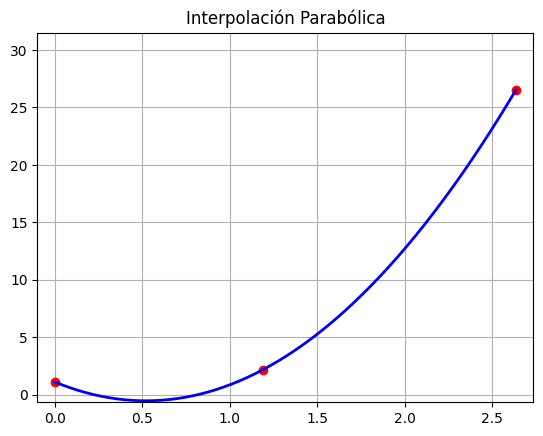

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton

# Datos de entrada
xs = [
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070, 1.0367,
    1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557, 2.1610, 2.6344,
]

ys = [
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887, 3.1239,
    2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865, 11.8221, 26.5077,
]

# Elegimos el primer, último y punto intermedio como base
p1 = [xs[0], ys[0]]
p3 = [xs[-1], ys[-1]]
# Usamos el punto central como punto intermedio movible
mid_index = len(xs) // 2
p2 = [xs[mid_index], ys[mid_index]]

fig, ax = plt.subplots()
ax.set_xlim(min(xs)-0.1, max(xs)+0.1)
ax.set_ylim(min(ys)-1, max(ys)+5)
plt.title("Interpolación Parabólica")
plt.grid(True)

# Dibujar los puntos y la curva
points, = ax.plot([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], 'ro')
curve, = ax.plot([], [], 'b-', linewidth=2)

selected = [False]

def interpolate_parabola(p1, p2, p3):
    # Resolver el sistema para hallar a, b, c de la parábola
    A = np.array([
        [p1[0]**2, p1[0], 1],
        [p2[0]**2, p2[0], 1],
        [p3[0]**2, p3[0], 1]
    ])
    Y = np.array([p1[1], p2[1], p3[1]])
    a, b, c = np.linalg.solve(A, Y)
    return lambda x: a * x**2 + b * x + c

def update_plot():
    # Actualizar puntos y curva
    points.set_data([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]])
    f = interpolate_parabola(p1, p2, p3)
    x_vals = np.linspace(p1[0], p3[0], 300)
    y_vals = f(x_vals)
    curve.set_data(x_vals, y_vals)
    fig.canvas.draw_idle()

def on_press(event):
    if event.button == MouseButton.LEFT and event.inaxes:
        if abs(event.xdata - p2[0]) < 0.05 and abs(event.ydata - p2[1]) < 0.5:
            selected[0] = True

def on_release(event):
    selected[0] = False

def on_motion(event):
    if selected[0] and event.inaxes and event.xdata and event.ydata:
        p2[0], p2[1] = event.xdata, event.ydata
        update_plot()

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

update_plot()
plt.show()
